# New York housing price analysis

In this notebook, we analyze a dataset containing housing prices in New York city based on different attributes with the aim of constructing a regression model with a subset of of these features for future housing price predictions. This notebook also contains a detailed 'Exploratory Data Analysis' section containing relevant graphs for determining the relationships between the different attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

df_housing = pd.read_csv('NY-House-Dataset.csv')

df_housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


The dataset comprises of 17 columns, 16 of which are features. They are - 
1. Broker 
2. Type of property
3. Number of bedrooms
4. Number of bathrooms
5. Property area in square feet
6. Address of the property
7. State (with ZIP code)
8. Main address (a slightly detailed version of address)
9. Administrative area level (somewhat more complicated to define since it contains both 'New York County' and 'United States')
10. Locality
11. Sublocality
12. Street name
13. Long name
14. Formatted address (the most complete address provided in the dataframe)
15. Latitude
16. Longitude 

There are no missing values in any of the columns (in actuality, there were missing data and, as we shall see, they have just been filled in by the person who created the dataset). However, most columns in the dataframe are strings. But most of the string features might as well be redundant.

In [2]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [3]:
df_housing.TYPE.unique()

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

We can also collect all the unique ZIP codes from 'MAIN_ADDRESS' or 'FORMATTED_ADDRESS' by applying a string split and collecting the last element.

In [10]:
zip_codes = df_housing.MAIN_ADDRESS.apply(lambda x: str.split(x)[-1])

df_housing['ZIP_CODES'] = zip_codes 

print(zip_codes.unique())
print('Total number of unique ZIP codes: ' + str(len(zip_codes.unique())))

['10022' '10019' '10312' '10065' '11238' '10027' '10304' '10473' '11230'
 '10451' '10303' '11372' '11373' '10014' '11377' '11209' '10471' '11374'
 '10301' '11375' '10465' '10307' '11435' '11214' '10314' '11207' '11219'
 '11355' '11249' '10453' '11204' '11421' '10012' '11358' '11419' '10013'
 '11231' '11217' '10023' '11235' '10002' '11218' '10306' '10308' '10075'
 '11221' '11237' '11357' '10305' '11385' '10466' '11422' '10128' '10010'
 '11436' '11234' '10025' '11210' '10021' '10463' '10469' '10470' '10309'
 '11229' '11215' '10029' '10031' '11228' '10467' '11208' '11417' '11413'
 '10032' '11691' '11426' '10007' '11360' '11103' '11005' '11365' '10458'
 '10024' '11697' '10452' '11414' '11411' '11224' '11694' '10280' '11201'
 '11369' '11362' '10474' '11354' '11415' '10038' '11105' '11216' '10302'
 '11368' '11223' '10011' '10016' '10462' '10475' '11212' '11205' '11203'
 '10036' '10028' '10017' '10033' '11236' '10310' '10006' '10001' '11226'
 '10040' '11378' '10003' '10069' '10472' '11429' '1

The SUBLOCALITY column is quite inconsistent - with a combination of county and neighborhood information. For example, the five boroughs of NYC are coextensive with the five counties: New York County (Manhattan), Kings County (Brooklyn), Bronx County (The Bronx), Richmond County (Staten Island) and Queens County (Queens).

In [50]:
df_housing.SUBLOCALITY.unique()

array(['Manhattan', 'New York County', 'Richmond County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

## Exploratory Data Analysis

We first look at the descriptive statistics of the dataset. We pay particular attention to the 'PRICE' attribute and its statistics 
$$ \rm{E}\left( \rm{PRICE} \right) = \$\:2.36\times 10^6,\:\rm{PRICE}_{\rm{min}}=\$\:2494.00,\:\rm{PRICE}_{\rm{max}}=\$\:2.15\times 10^9,\:\sigma=\$\:3.14\times 10^7 $$
There is great disparity between the minimum and maximum prices and there may be many outliers present. Importantly, we will see that prices are quite dependent on the NYC borough in which they are located as well as the community district of the particular borough.

In [15]:
df_housing.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [11]:
'''
The PRICE column has an extremly wide range of values from 10^3 to 10^9. For easier visual inspection, we create a LOG_PRICE column and produce a pairplot.
'''
df_housing['LOG_PRICE'] = df_housing['PRICE'].apply(lambda x: np.log10(x))

'''
Another important quantity is PRICE per SQFT
'''
df_housing['PRICE_SQFT'] = df_housing.PRICE / df_housing.PROPERTYSQFT

### Correlations

How are the different numerical attributes correlated? We can obtain some relevant information regarding this through the scatterplot matrix (pairplot) and a correlation matrix heatmap. The most obvious linear correlation is between number of beds and baths with $r^2 = 0.78$. 'BEDS' and 'PROPERTYSQFT' also display some lienar correlation. However, it is not as strong since the properties that are the largest also have fewer beds. Furthermore, the logarithmic price has some positive correlation with all of these attributes. The relation between 'PRICE' with 'LATITUDE' and 'LONGITUDE' may as well depend on particular borough location of the property.

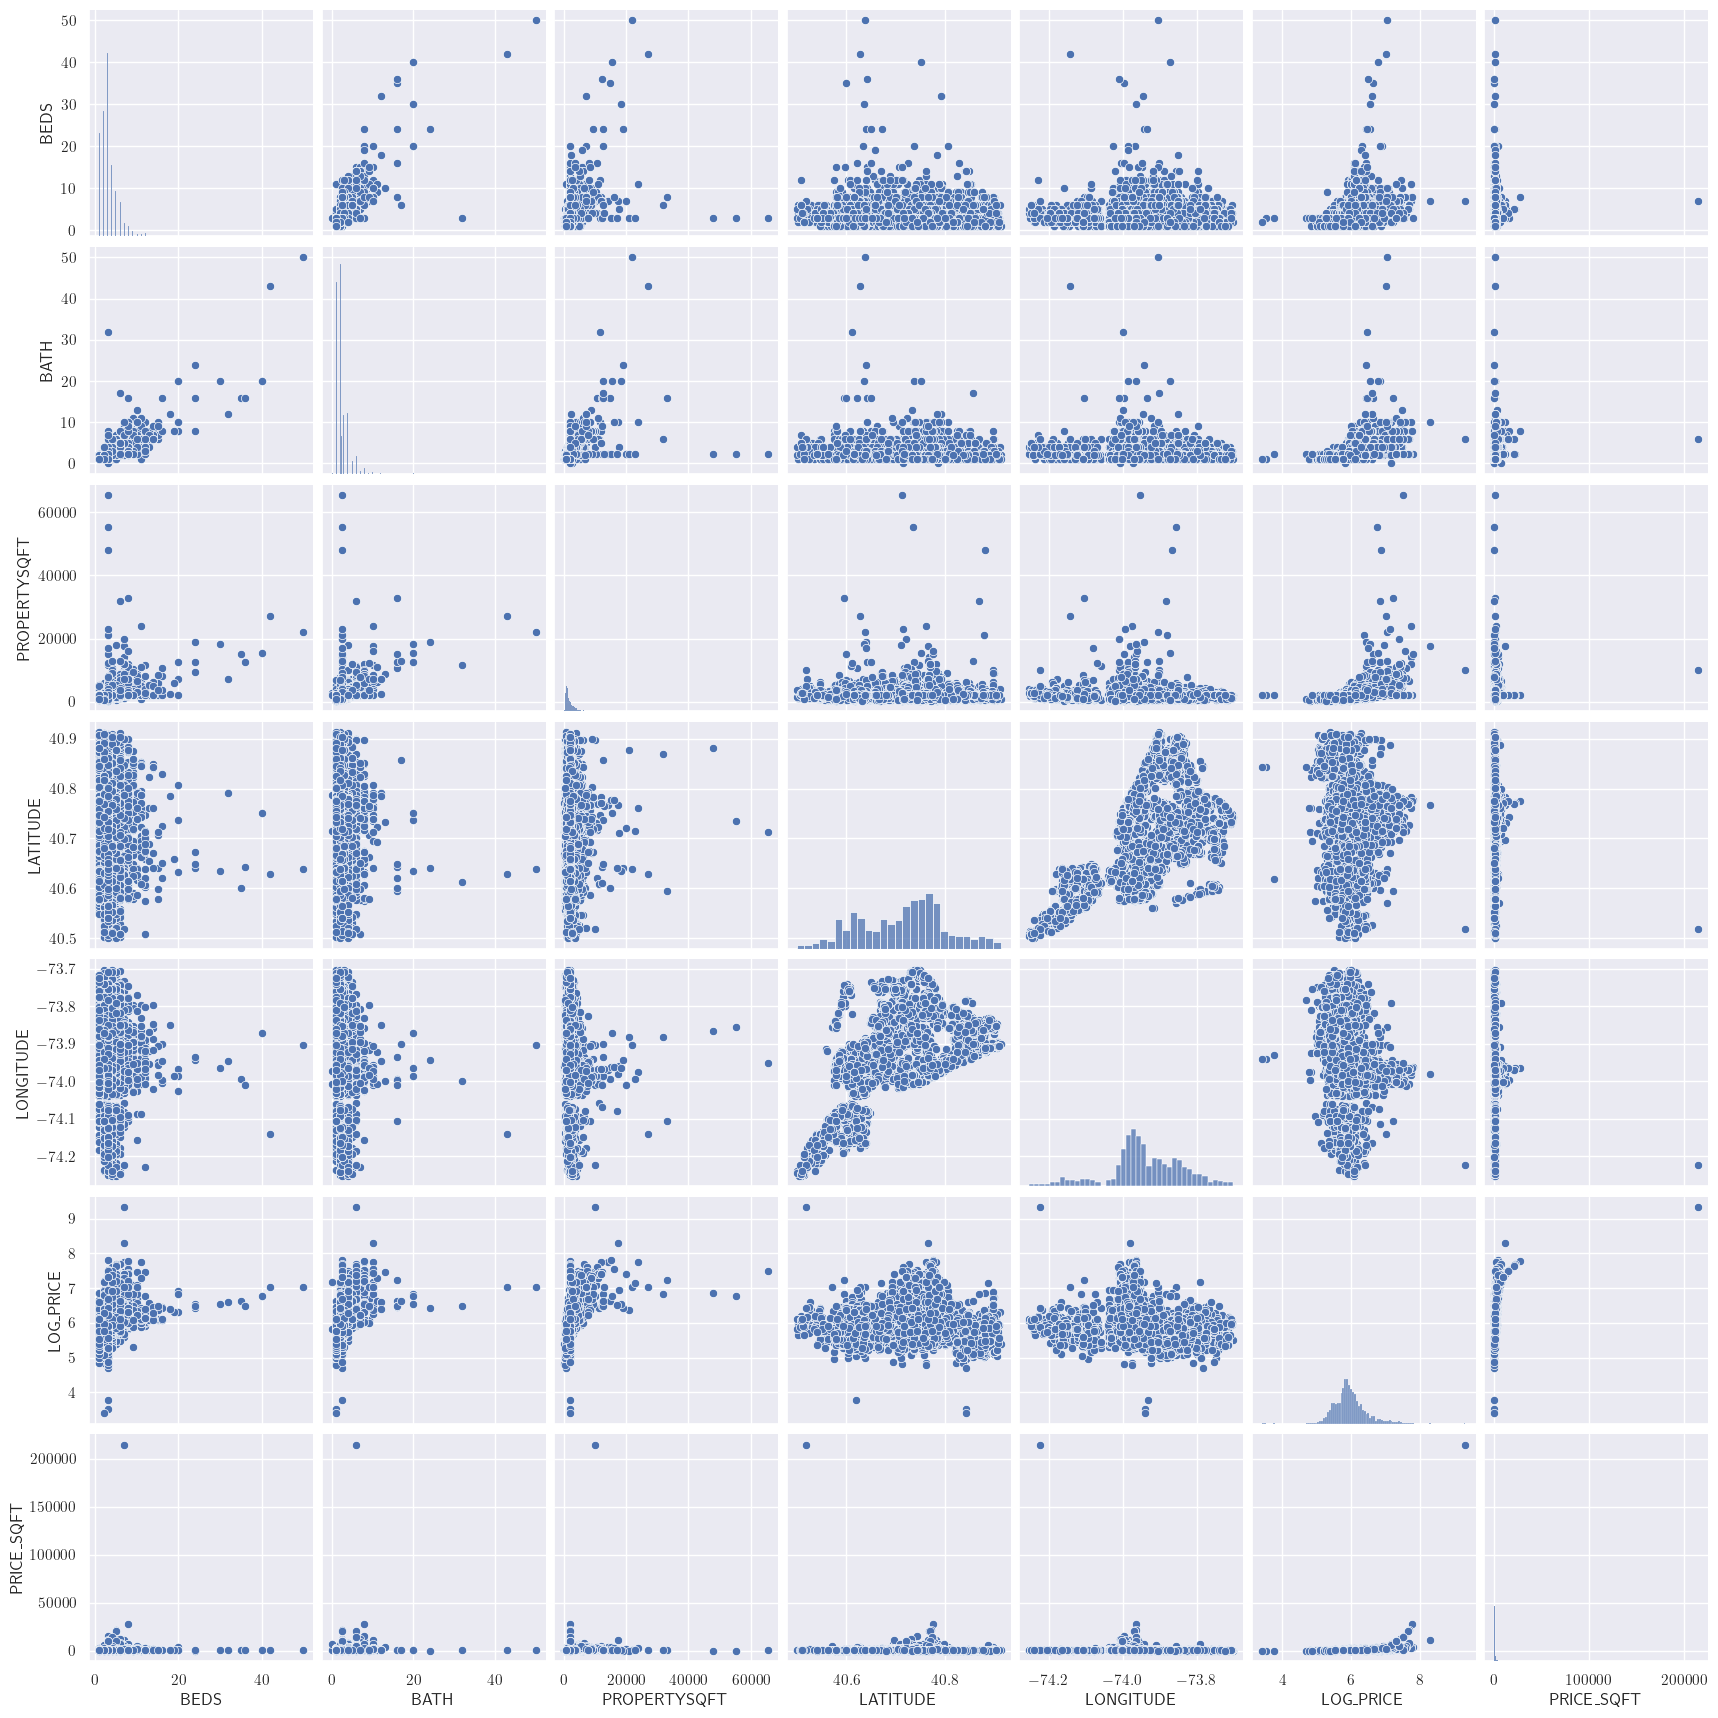

In [12]:
sns.pairplot( data=df_housing.iloc[:,3:], diag_kind='hist'  )
plt.show()

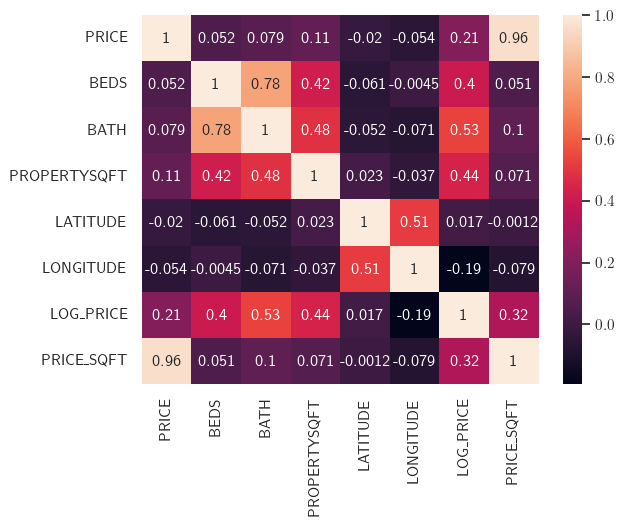

In [13]:
sns.heatmap(df_housing.select_dtypes(['int64', 'float64']).corr(), annot=True)
plt.show()

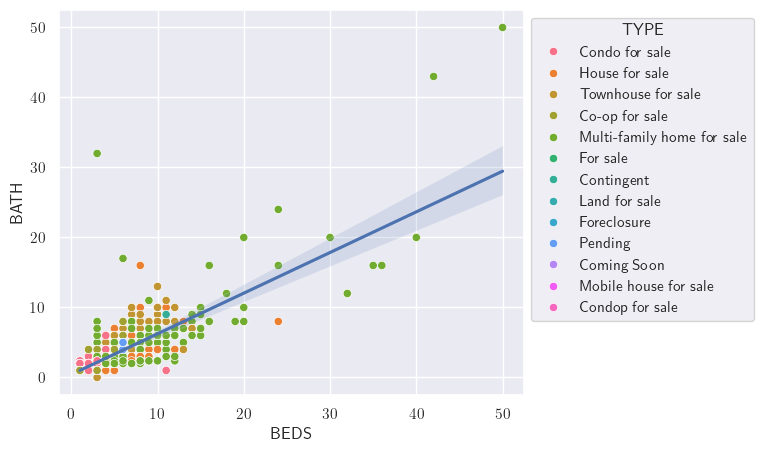

In [14]:
fig, ax = plt.subplots(figsize=(6,5))

ax = sns.scatterplot( x=df_housing.BEDS, y=df_housing.BATH, hue=df_housing.TYPE )
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
sns.regplot(x=df_housing.BEDS, y=df_housing.BATH, scatter=False)
plt.show()

### Types of properties, possible errors in data and outliers

Important statistics can be gleamed from the relationship between price and the type of property. From the dataset, we find thirteen unique types of properties. Among them, we observe that certain types of properties for sale, there are also contingent properties and certain properties for sale without descriptors and foreclosures. These types of properties without fixed description maybe problematic for machine learning purposes since they cannot be really classified under the labels of most frequently occuring properties.

In [5]:
df_housing.groupby('TYPE')[['PRICE', 'PROPERTYSQFT']].describe()

PRICE                                         \
                             count          mean           std        min   
TYPE                                                                        
Co-op for sale              1450.0  1.100418e+06  3.251499e+06    49500.0   
Coming Soon                    2.0  1.172000e+06  7.396337e+05   649000.0   
Condo for sale               891.0  2.630710e+06  7.791476e+06    60000.0   
Condop for sale                5.0  9.986000e+05  2.255378e+05   598000.0   
Contingent                    88.0  8.825717e+05  1.365915e+06   193999.0   
For sale                      20.0  1.954536e+06  1.875709e+06     2494.0   
Foreclosure                   14.0  1.343010e+06  2.518298e+06   249900.0   
House for sale              1012.0  3.684216e+06  6.754506e+07   130000.0   
Land for sale                 49.0  1.073021e+06  1.212969e+06     5800.0   
Mobile house for sale          1.0  1.288000e+06           NaN  1288000.0   
Multi-family home for sale   727.0  1.680428e+06  2.465464e+06   250000.0   
Pending                      243.0  1.340867e+06  2.698604e+06    90000.0   
Townhouse for sale           299.0  6.365925e+06  8.368261e+06   315000.0   

                                                                             \
                                   25%        50%         75%           max   
TYPE                                                                          
Co-op for sale               279000.00   425000.0   799000.00  6.000000e+07   
Coming Soon                  910500.00  1172000.0  1433500.00  1.695000e+06   
Condo for sale               575000.00   899000.0  2150000.00  1.950000e+08   
Condop for sale             1065000.00  1080000.0  1125000.00  1.125000e+06   
Contingent                   486749.75   682450.0   854975.00  1.285000e+07   
For sale                     811000.00  1044500.0  2812500.00  6.500000e+06   
Foreclosure                  484000.00   592450.0   864908.75  9.999000e+06   
House for sale               659000.00   859000.0  1289000.00  2.147484e+09   
Land for sale                285000.00   650000.0  1395000.00  6.100000e+06   
Mobile house for sale       1288000.00  1288000.0  1288000.00  1.288000e+06   
Multi-family home for sale   890000.00  1199000.0  1690000.00  3.400000e+07   
Pending                      544500.00   800000.0  1287500.00  3.600000e+07   
Townhouse for sale          1231500.00  2950000.0  7950000.00  6.500000e+07   

                           PROPERTYSQFT                            \
                                  count         mean          std   
TYPE                                                                
Co-op for sale                   1450.0  1661.939812   749.630336   
Coming Soon                         2.0  2217.103931    46.522067   
Condo for sale                    891.0  1574.625033  1166.496161   
Condop for sale                     5.0  2184.207862     0.000000   
Contingent                         88.0  1775.223442  1076.133576   
For sale                           20.0  2116.483145  1490.521559   
Foreclosure                        14.0  2331.229133  1044.325001   
House for sale                   1012.0  2255.556856  1911.646137   
Land for sale                      49.0  2159.019946   176.315409   
Mobile house for sale               1.0  2184.207862          NaN   
Multi-family home for sale        727.0  3259.883946  4683.478406   
Pending                           243.0  2070.169925  1307.436338   
Townhouse for sale                299.0  3891.136747  2864.053979   

                                                                   \
                                    min          25%          50%   
TYPE                                                                
Co-op for sale               250.000000   900.000000  2184.207862   
Coming Soon                 2184.207862  2200.655897  2217.103931   
Condo for sale               294.000000   838.500000  1230.000000   
Condop for s

In general, we observe an increase in the number of beds with property size. However, there are several properies with very large square footage by very little beds (mostly occuring for 'Multi-family homes'). For quite a few of these occurences, the number of baths exceeds the number of beds. For example, the property positioned at index 622 is reported to have 3 beds but 32 baths. Moreover, there are numerous properties where the number of baths is fractional, which probably were previously NaN values filled in with mean/median values. 

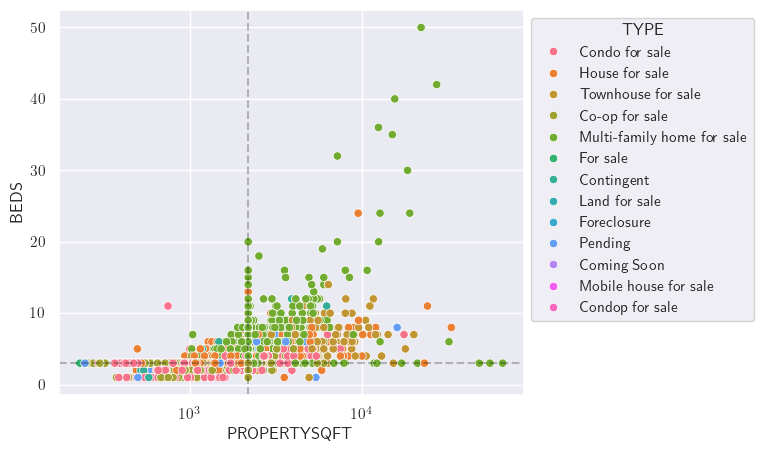

In [21]:
fig, ax = plt.subplots(figsize=(6,5))

ax = sns.scatterplot( x=df_housing.PROPERTYSQFT, y=df_housing.BEDS, hue=df_housing.TYPE )
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
plt.axvline(2184, color='black', linestyle='dashed', alpha=0.25)
plt.axhline(3, color='black', linestyle='dashed', alpha=0.25)
ax.set_xscale('log')
plt.show()

Here, we see that three properties have a great disparity between the numbers of beds and baths 

1. idx = 7, # of beds = 8, # of baths = 16
2. idx = 622, # of beds = 3, # of baths = 32
3. idx = 4691, # of beds = 6, # of baths = 17

For these properties, the no. of baths will be set equal to the no. of beds.

In [7]:
df_housing[ 
    (df_housing.PROPERTYSQFT >= 10**4)
    &
    (df_housing.BEDS < 10) ][['TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT']]

,TYPE,BEDS,BATH,PROPERTYSQFT
1,Condo for sale,7,10.000000,17545.0
4,Townhouse for sale,7,2.373861,14175.0
7,House for sale,8,16.000000,33000.0
69,Townhouse for sale,3,2.373861,15200.0
99,House for sale,8,8.000000,12000.0
181,Townhouse for sale,4,2.373861,10582.0
304,House for sale,7,6.000000,10000.0
601,Townhouse for sale,7,9.000000,12300.0
622,Multi-family home for sale,3,32.000000,11760.0
823,Multi-family home for sale,3,2.373861,48000.0


In [23]:
df_housing.loc[[7, 622, 4691], 'BATH'] = df_housing.loc[[7, 622, 4691], 'BEDS']

df_housing.loc[[7, 622, 4691]]

df_housing.BATH = df_housing.BATH.apply(np.rint) # rounding number of baths to integers

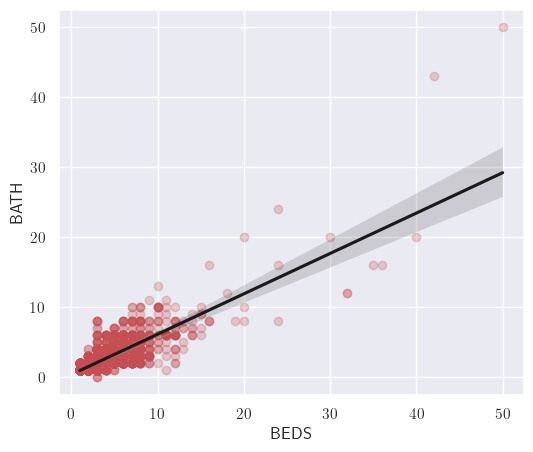

In [24]:
fig, ax = plt.subplots(figsize=(6,5))

sns.regplot(x=df_housing.BEDS, y=df_housing.BATH, line_kws=dict(color='k'), scatter_kws=dict(color='r', alpha=0.25))
plt.show()

It also appears that
$$ \log\left( \rm{PRICE} \right) \propto \log\left( \rm{PROPERTYSQFT} \right) $$
The Pearson correlation between these logarithmic quantities is $ r\approx 0.59 $, which indicates more significant correlation compared to the base quantities. The linear correlation is worsened by the large number of points that have the same property size but increasing prices.

In [25]:
log_size = df_housing.PROPERTYSQFT.apply(np.log)
log_price = df_housing.PRICE.apply(np.log)

print('Correlation between logarithms of property size and price ' + str(log_price.corr(log_size)))

Correlation between logarithms of property size and price 0.5852575237699829


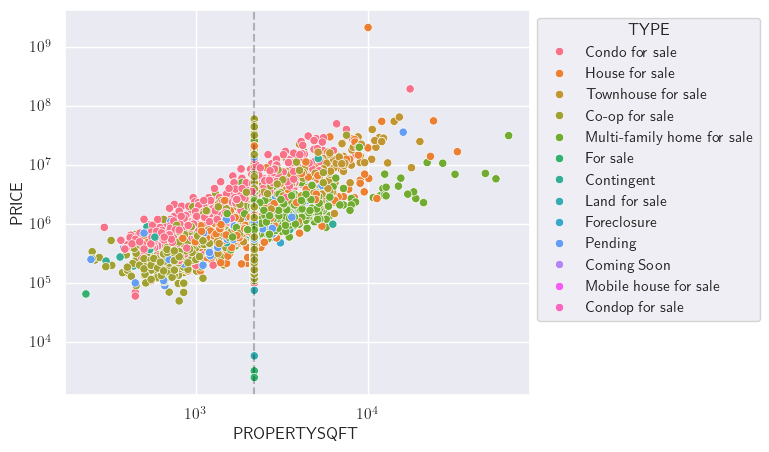

In [26]:
fig, ax = plt.subplots( figsize=(6,5))

ax = sns.scatterplot( x=df_housing.PROPERTYSQFT, y=df_housing.PRICE, hue=df_housing.TYPE )
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
plt.axvline(2184, color='black', linestyle='dashed', alpha=0.25)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

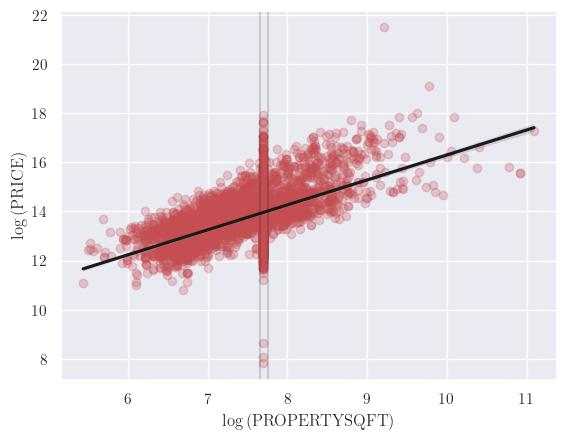

In [18]:
sns.regplot(x=log_size, y=log_price, fit_reg=True, line_kws=dict(color='k'), scatter_kws=dict(color='r', alpha=0.25))
plt.axvline(7.65, color='black', alpha=0.15)
plt.axvline(7.75, color='black', alpha=0.15)
plt.xlabel(r'$ \log\left( \rm{PROPERTYSQFT} \right) $')
plt.ylabel(r'$ \log\left( \rm{PRICE} \right) $')
plt.show()

There are a large number of entries (1621) that have been listed as having area of 2,184 sqft. This is clearly erroneous data, which, again, were former NaN values filled in with median square footage. However, they also represent a significant proportion of the total number of data points and cannot be safely ignored either. One way these can fixed is to isolate the subset of data and use the mean or median square footage of similar properties and replace the previous values with these. This will be done later when we include geographical data.

In [27]:
area = 2184.207862 # this is where these is a vertical line in the price vs sqft scatter plot

df_same_sqft = df_housing[ df_housing.PROPERTYSQFT == area ]
df_same_sqft.shape

(1621, 20)

There are two rather big outliers in terms of price. These prices are 2.147 billion USD and 195 million USD, which are of the type 'House' and 'Condo' respectively. We will see that the most expensive one is apparently an erroneous entry. This will be fixed later. The whiskers on the boxplot here are plotted such that the outliers lie beyond the $3\sigma$ interval.

In [28]:
df_housing.PRICE.sort_values(ascending=False).head()

304     2147483647
1        195000000
69        65000000
1075      60000000
141       56000000
Name: PRICE, dtype: int64

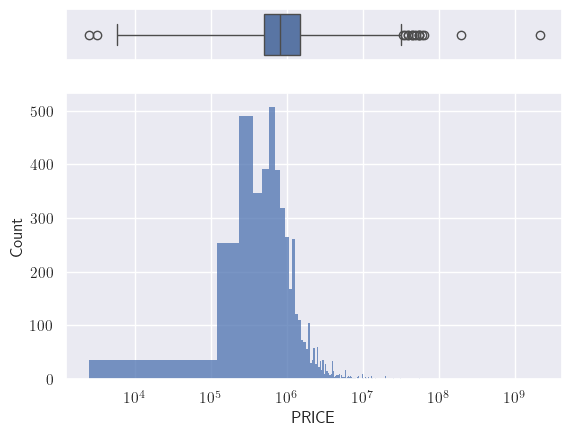

In [29]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df_housing.PRICE, ax=ax_box, whis=[0.03, 99.7]) # Boxplot with the whiskers placed at the 3 sigmas
sns.histplot(x=df_housing.PRICE, ax=ax_hist)
ax_box.set_xscale('log')
ax_hist.set_xscale('log')

plt.show()

In [30]:
whisker_low, whisker_high = df_housing.PRICE.quantile([0.0003, 0.997])

print( 'Number of listings below 3-sigma of mean: ' + str(df_housing[ df_housing.PRICE < whisker_low ].shape[0]) )
print( 'Number of listings above 3-sigma of mean: ' + str(df_housing[ df_housing.PRICE > whisker_high ].shape[0]) )

Number of listings below 3-sigma of mean: 2
Number of listings above 3-sigma of mean: 15


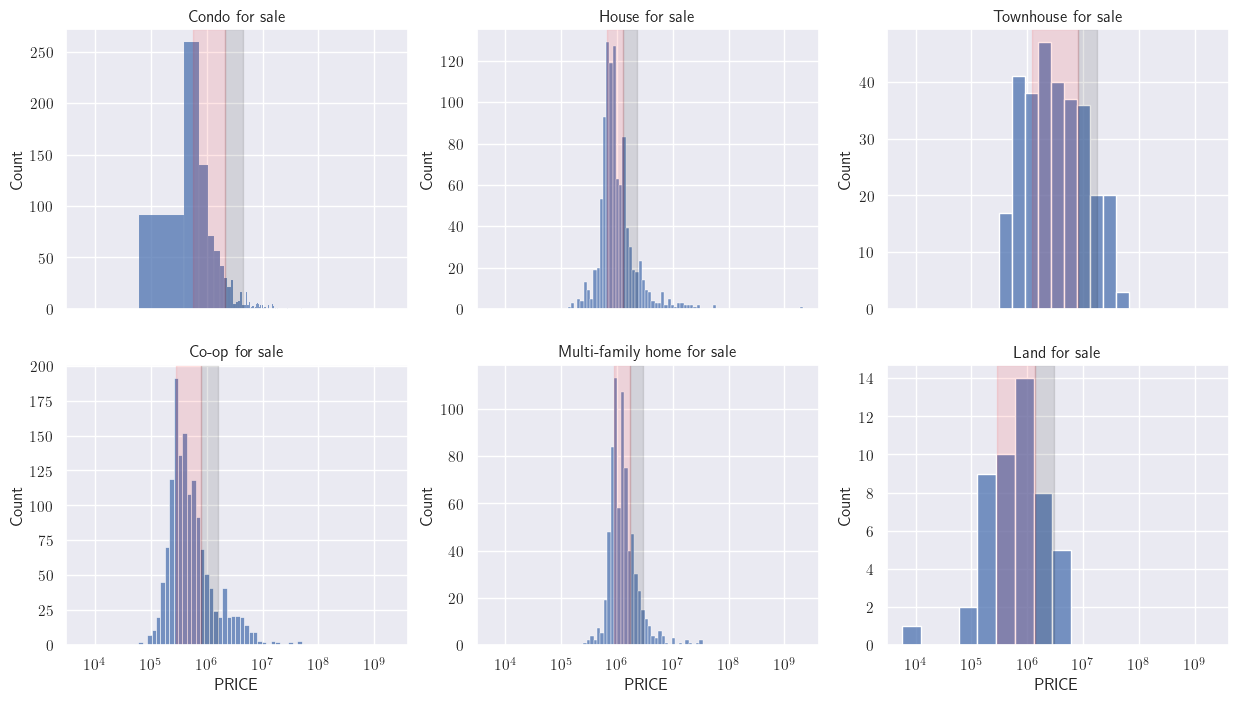

In [31]:
TYPE = ['Condo for sale',
        'House for sale',
        'Townhouse for sale',
        'Co-op for sale',
        'Multi-family home for sale',
        'Land for sale']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8), sharex=True)

for i, ax in enumerate(axes.flatten()):
    
    df_type = df_housing[df_housing.TYPE == TYPE[i]]
    lq, uq = df_type.PRICE.quantile([0.25, 0.75])
    iqr = uq - lq 

    sns.histplot( x=df_type.PRICE, bins='auto', ax=ax )
    ax.axvspan(lq, uq, color='red', alpha=0.1)
    ax.axvspan(uq, uq + 1.5*iqr, color='black', alpha=0.1)
    ax.set_xscale('log')
    ax.set_title(TYPE[i])

plt.show()

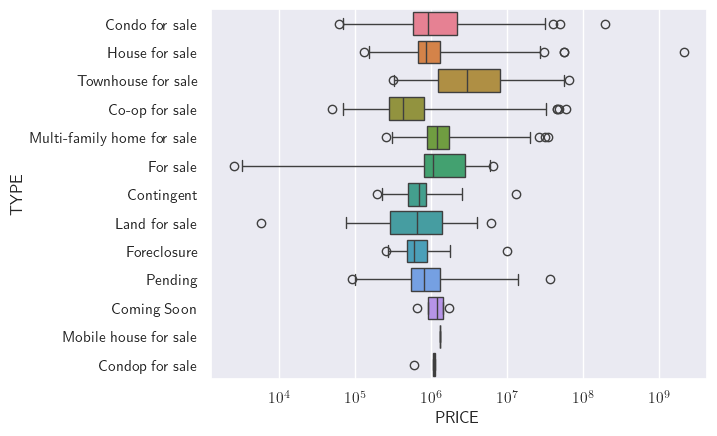

In [32]:
sns.boxplot( y=df_housing.TYPE, x = df_housing.PRICE, hue=df_housing.TYPE, whis=[0.03, 99.7] )
plt.xscale('log')

### Geography dependence

The price of property in any city is dependent on the location and the same is also true for NYC. Here we encode the price information on a map of NYC that has been segmented into boroughs and community disctricts (CDs) using geopandas. For easier interpretability, the prices have been separated into the following ranges
1. CLASS 1: $ \$\:10^3\:\rm{US} \leq \rm{PRICE} < \$\:10^4\:\rm{USD} $ 
2. CLASS 2: $ \$\:10^4\:\rm{US} \leq \rm{PRICE} < \$\:10^5\:\rm{USD} $ 
3. CLASS 3: $ \$\:10^5\:\rm{US} \leq \rm{PRICE} < \$\:10^6\:\rm{USD} $ 
4. CLASS 4: $ \$\:10^6\:\rm{US} \leq \rm{PRICE} < \$\:10^7\:\rm{USD} $ 
5. CLASS 5: $\rm{PRICE}\geq \$\:10^7\:\rm{USD}$

In [33]:
import geopandas as gpd
from geodatasets import get_path

path_to_data = get_path('nybb') # built-in geopandas dataframe on NYC
ny_boroughs = gpd.read_file(path_to_data)
ny_CD = gpd.read_file('./Community_Districts/geo_export_50afcaa7-d801-43f3-b1f5-cf1542b406ba.shp') # additional shapefile containing NYC community district data

ny_boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [34]:
ny_CD.head()

,boro_cd,shape_area,shape_leng,geometry
0,308.0,4.560379e+07,38232.886649,"POLYGON ((-73.95829 40.67983, -73.95596 40.679..."
1,205.0,3.831698e+07,29443.048056,"POLYGON ((-73.89138 40.86170, -73.89142 40.861..."
2,311.0,1.032083e+08,51534.144746,"POLYGON ((-73.97299 40.60881, -73.97296 40.608..."
3,410.0,1.720774e+08,105822.376549,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ..."
4,164.0,3.831238e+07,32721.097627,"POLYGON ((-73.94923 40.79687, -73.94942 40.796..."


In [42]:
# Gathering the coordinates (longitude/latitude) of all the CDs

ny_CD['coord'] = ny_CD['geometry'].apply( lambda x: x.representative_point().coords[:] )

ny_CD['coord'] = [coords[0] for coords in ny_CD.coord]

ny_CD['CD'] = ny_CD.boro_cd.astype(np.int64).astype(str)

ny_CD.head()

,boro_cd,shape_area,shape_leng,geometry,coord,CD
0,308.0,4.560379e+07,38232.886649,"POLYGON ((-73.95829 40.67983, -73.95596 40.679...","(-73.94545913768121, 40.67338767399892)",308
1,205.0,3.831698e+07,29443.048056,"POLYGON ((-73.89138 40.86170, -73.89142 40.861...","(-73.9097177437186, 40.85365289770583)",205
2,311.0,1.032083e+08,51534.144746,"POLYGON ((-73.97299 40.60881, -73.97296 40.608...","(-73.99428263554637, 40.60632372934502)",311
3,410.0,1.720774e+08,105822.376549,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ...","(-73.82900441292807, 40.66797529939021)",410
4,164.0,3.831238e+07,32721.097627,"POLYGON ((-73.94923 40.79687, -73.94942 40.796...","(-73.96557217401126, 40.782459599544914)",164


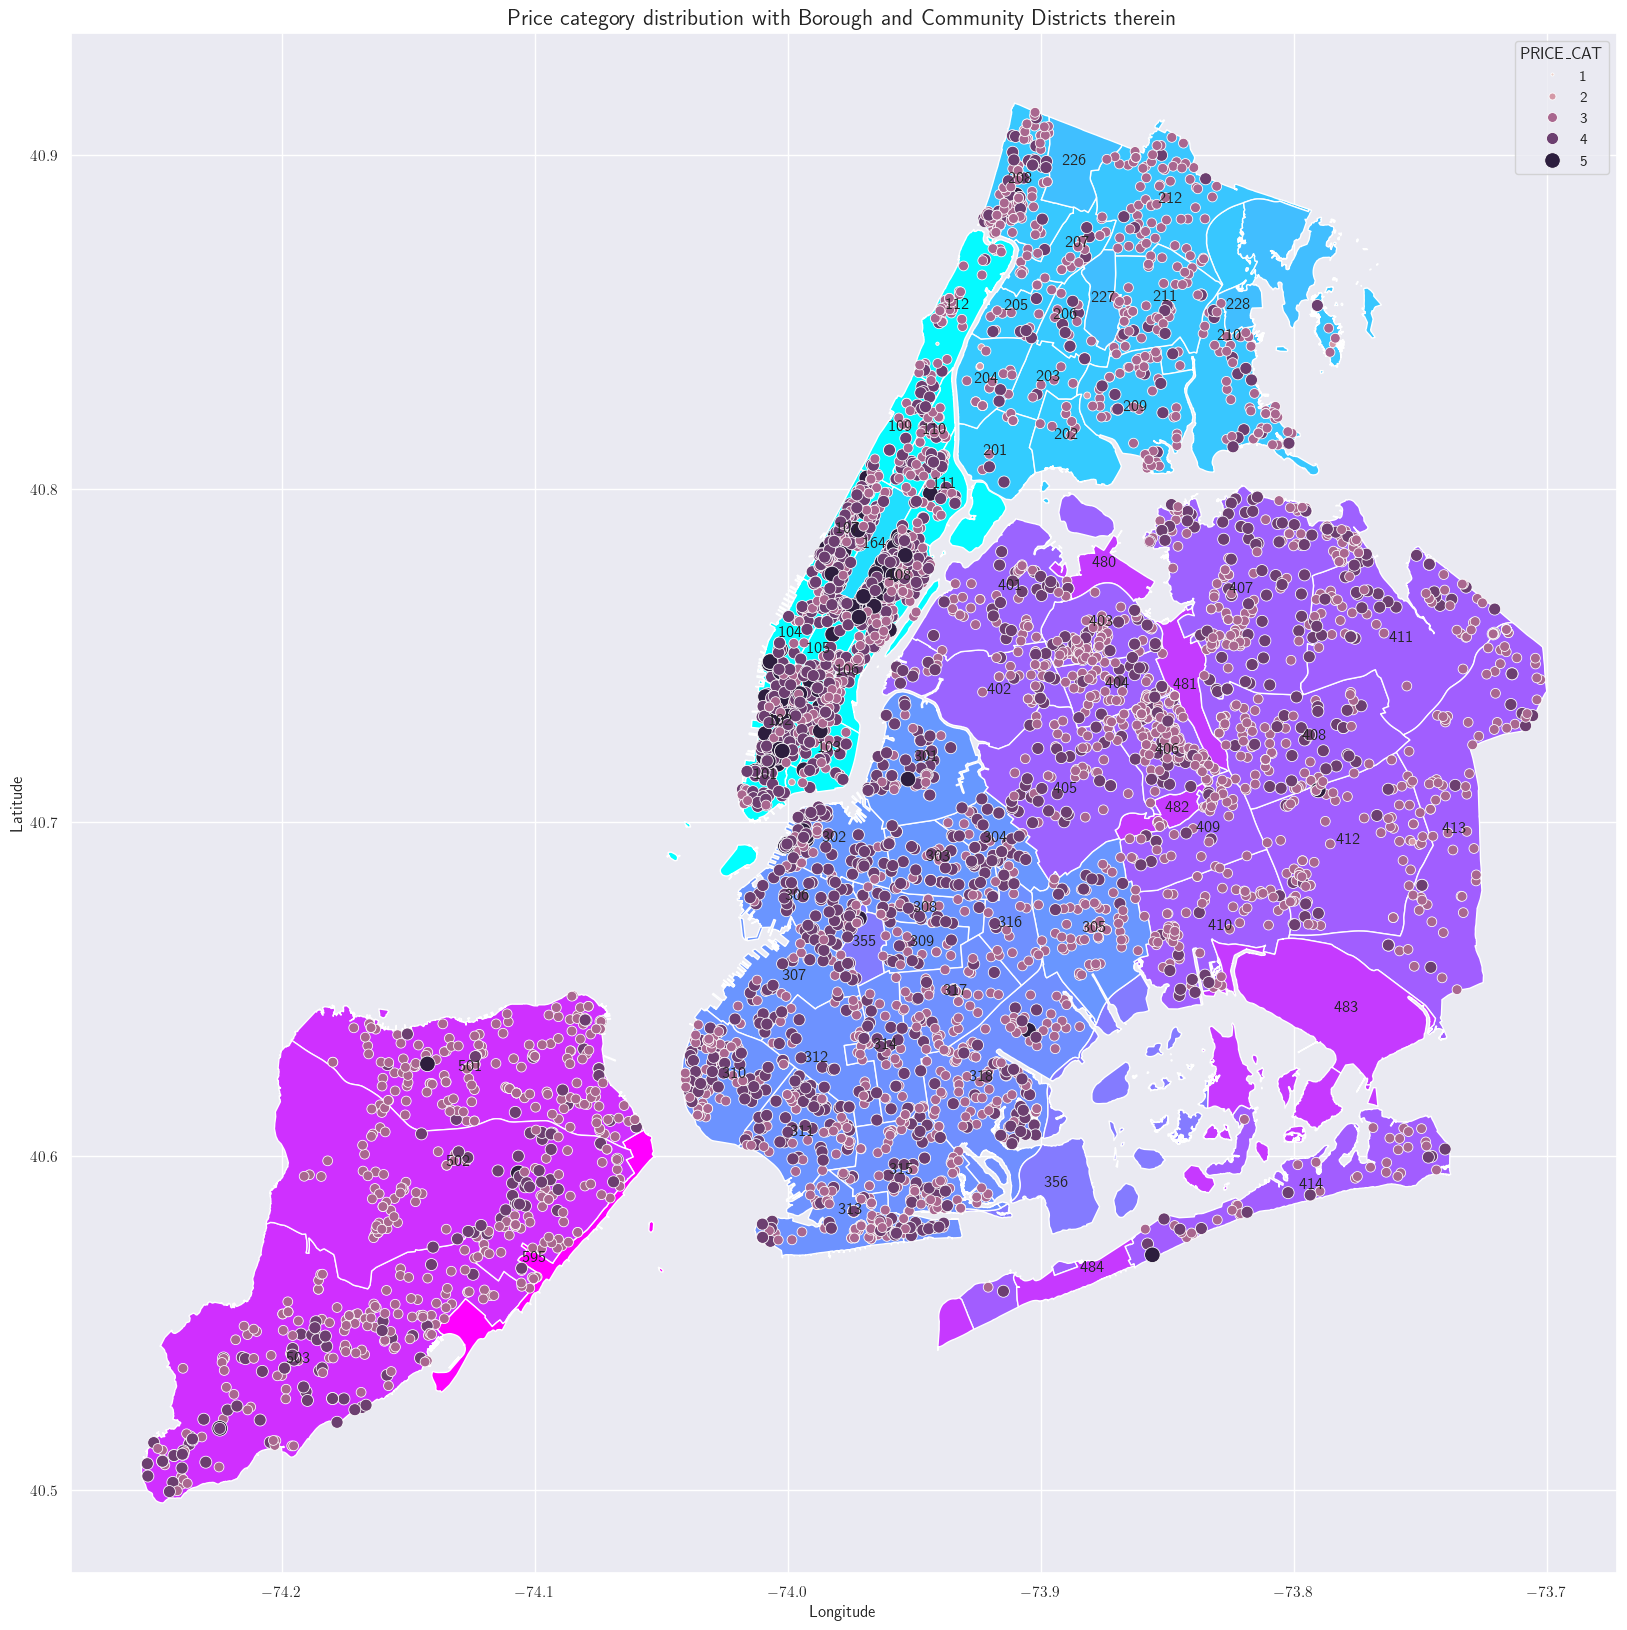

In [53]:
ny_boroughs['area'] = ny_boroughs.area
ny_boroughs = ny_boroughs.set_geometry('geometry').to_crs('EPSG:4326')

price = df_housing['PRICE']

def price_categorized(x):
    if 10**3 <= x < 10**4:
        return 1
    elif 10**4 <= x < 10**5:
        return 2
    elif 10**5 <= x < 10**6:
        return 3
    elif 10**6 <= x < 10**7:
        return 4
    else:
        return 5
price_cat = price.apply( price_categorized )
df_housing['PRICE_CAT'] = price_cat


fig, ax = plt.subplots(figsize=(20,20))
cmap = plt.get_cmap('jet')

ny_CD.plot(ax=ax, column='boro_cd', edgecolor='white', cmap='cool')
sns.scatterplot(x=df_housing.LONGITUDE, y=df_housing.LATITUDE, hue=df_housing.PRICE_CAT, size=df_housing.PRICE_CAT, sizes=[5,25,50,75,125])

for index, row in ny_CD.iterrows():
    plt.annotate( text=row['CD'], xy=row['coord'], horizontalalignment='center', weight='bold' )

ax.set_xlabel(r'Longitude')
ax.set_ylabel(r'Latitude')
ax.set_title(r'Price category distribution with Borough and Community Districts therein', fontsize=16)
plt.show()

As expected, the price distribution is highly dependent on the borough in which the property is located. Manhattan, Brooklyn an Queens have a similar total number of listings. However, the most expensive ones are located in Manhattan. On the otherhand, however, the data also shows that the cheapest listings are also located in Manhattan. These are obviously erroneous additions and might mean monthly rent and not the property price.

In [45]:
from shapely.geometry import Point 

'''
Create a geopandas Point object using 'LATITUDE' and 'LONGITUDE' information from the dataframe to determine which borough and community district the 
property is in.
'''
geo_points = df_housing.apply( lambda row: Point(row.LONGITUDE, row.LATITUDE), axis=1 )
df_housing['GEO_POINTS'] = geo_points

df_housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,ZIP_CODES,LOG_PRICE,PRICE_SQFT,PRICE_CAT,GEO_POINTS
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,...,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,10022,5.498311,225.000000,3,POINT (-73.9744834 40.761255)
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,...,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,10019,8.290035,11114.277572,5,POINT (-73.98099089999999 40.7663935)
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,...,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,10312,5.414973,129.032258,3,POINT (-74.1961086 40.5418051)
3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,...,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,10022,4.838849,155.056180,2,POINT (-73.9746128 40.7613979)
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.0,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,...,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,10065,7.740363,3880.070547,5,POINT (-73.9698561 40.7672235)


In [51]:
def point_to_borough(point):
    check = point.within(ny_boroughs.geometry)
    idx = check[check].index[0]

    return ny_boroughs.BoroName.loc[idx]

def point_to_CD(point):
    check = point.within(ny_CD.geometry)
    idx = check[check].index[0]

    return ny_CD.boro_cd.loc[idx]

df_housing['BOROUGH'] = df_housing.GEO_POINTS.apply( point_to_borough )
df_housing['COMMUNITY_DISTRICT'] = df_housing.GEO_POINTS.apply( point_to_CD )

In [52]:
df_housing['COMMUNITY_DISTRICT'] = df_housing['COMMUNITY_DISTRICT'].astype(np.int64)
df_housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,ZIP_CODES,LOG_PRICE,PRICE_SQFT,PRICE_CAT,GEO_POINTS,BOROUGH,COMMUNITY_DISTRICT
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,...,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,10022,5.498311,225.000000,3,POINT (-73.9744834 40.761255),Manhattan,105
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,...,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,10019,8.290035,11114.277572,5,POINT (-73.98099089999999 40.7663935),Manhattan,105
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,...,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,10312,5.414973,129.032258,3,POINT (-74.1961086 40.5418051),Staten Island,503
3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,...,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,10022,4.838849,155.056180,2,POINT (-73.9746128 40.7613979),Manhattan,105
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.0,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,...,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,10065,7.740363,3880.070547,5,POINT (-73.9698561 40.7672235),Manhattan,108


Here we see a borough and community district breakdown of listings in the five price categories that have been created. Unsurprisingly, Manhattan contains the highest proportion of listings that are priced greater than 10 million USD. In particular, CD #108 appears to be the most expensive in Manhattan. This makes sense, since the `Upper East Side' falls within this community district.

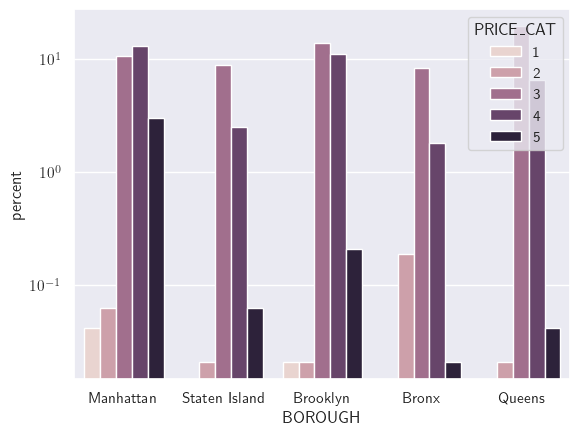

In [87]:
sns.countplot( x=df_housing.BOROUGH, hue=df_housing.PRICE_CAT, stat='percent' )
plt.yscale('log')
plt.show()

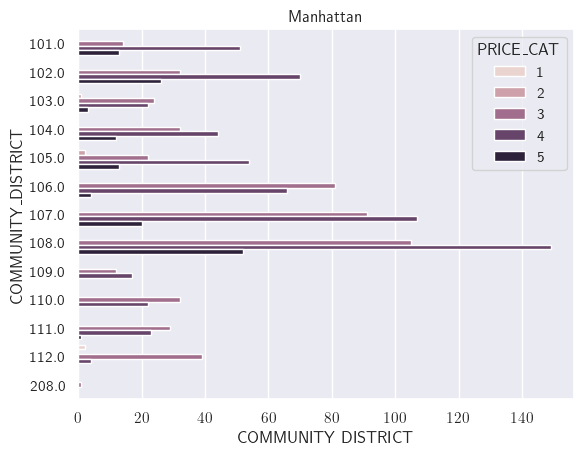

In [88]:
def boroughCD(df, borough_name):
    df_borough = df[ df['BOROUGH'] == borough_name ]
    return df_borough 

df_MHT = boroughCD(df_housing, 'Manhattan')

sns.countplot(y=df_MHT.COMMUNITY_DISTRICT, hue=df_housing.PRICE_CAT )
plt.xlabel(r'COMMUNITY DISTRICT')
plt.title('Manhattan')
plt.show()

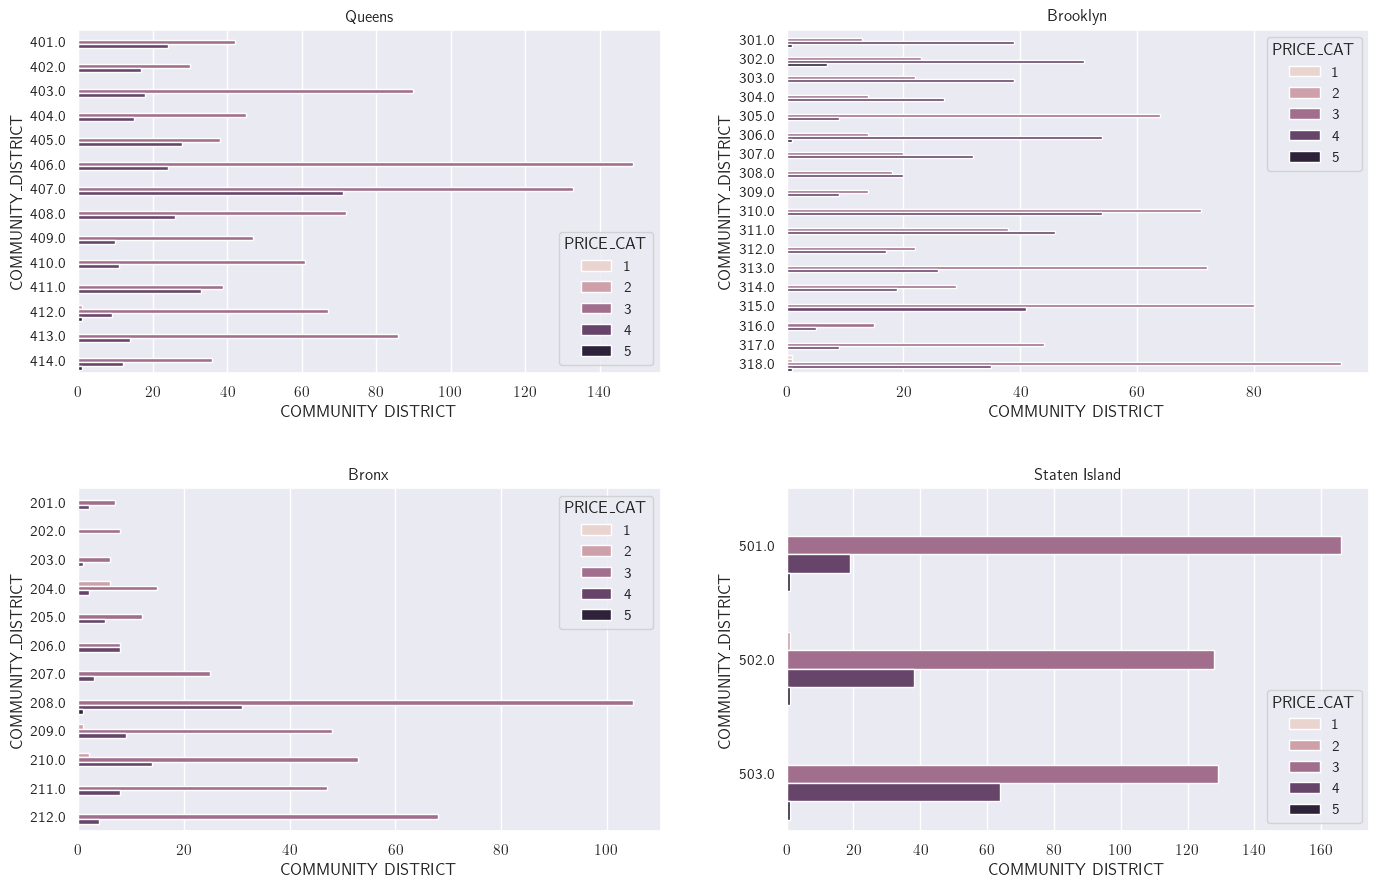

In [89]:
df_QUEENS = boroughCD(df_housing, 'Queens')
df_BKLN = boroughCD(df_housing, 'Brooklyn')
df_BRNX = boroughCD(df_housing, 'Bronx')
df_STAT = boroughCD(df_housing, 'Staten Island')

fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.tight_layout(pad=5)

sns.countplot(ax=ax[0,0], y=df_QUEENS.COMMUNITY_DISTRICT, hue=df_housing.PRICE_CAT )
ax[0,0].set_xlabel(r'COMMUNITY DISTRICT')
ax[0,0].set_title(r'Queens')

sns.countplot(ax=ax[0,1], y=df_BKLN.COMMUNITY_DISTRICT, hue=df_housing.PRICE_CAT )
ax[0,1].set_xlabel(r'COMMUNITY DISTRICT')
ax[0,1].set_title(r'Brooklyn')

sns.countplot(ax=ax[1,0], y=df_BRNX.COMMUNITY_DISTRICT, hue=df_housing.PRICE_CAT )
ax[1,0].set_xlabel(r'COMMUNITY DISTRICT')
ax[1,0].set_title(r'Bronx')

sns.countplot(ax=ax[1,1], y=df_STAT.COMMUNITY_DISTRICT, hue=df_housing.PRICE_CAT )
ax[1,1].set_xlabel(r'COMMUNITY DISTRICT')
ax[1,1].set_title(r'Staten Island')

plt.show()

In [90]:
df_housing.groupby('BOROUGH').describe()['PRICE']

,count,mean,std,min,25%,50%,75%,max
BOROUGH,,,,,,,,
Bronx,499.0,7.583150e+05,1.008273e+06,49500.0,282500.0,590000.0,894500.0,1.400000e+07
Brooklyn,1212.0,1.431187e+06,1.904929e+06,5800.0,567250.0,949000.0,1650000.0,3.150000e+07
Manhattan,1292.0,4.277375e+06,8.805249e+06,2494.0,699000.0,1495000.0,4146250.0,1.950000e+08
Queens,1250.0,8.228747e+05,8.032906e+05,75000.0,349000.0,668000.0,1044250.0,1.500000e+07
Staten Island,548.0,4.831589e+06,9.170286e+07,90000.0,549000.0,734900.0,989000.0,2.147484e+09


In [91]:
def price_histplot_borough(df, borough_name, ax):
    df_borough = df[ df.BOROUGH == borough_name ]
    lq, uq = df_borough.PRICE.quantile([0.25, 0.75])
    iqr = uq - lq

    sns.histplot( x=df_borough.PRICE, ax=ax, bins='auto' )
    ax.axvspan(lq, uq, 0, 500, color='red', alpha=0.1)
    ax.axvspan(uq, uq + 1.5*iqr, 0, 500, color='black', alpha=0.1)

    ax.set_xscale('log')
    ax.set_title(borough_name)
    
    return(ax)

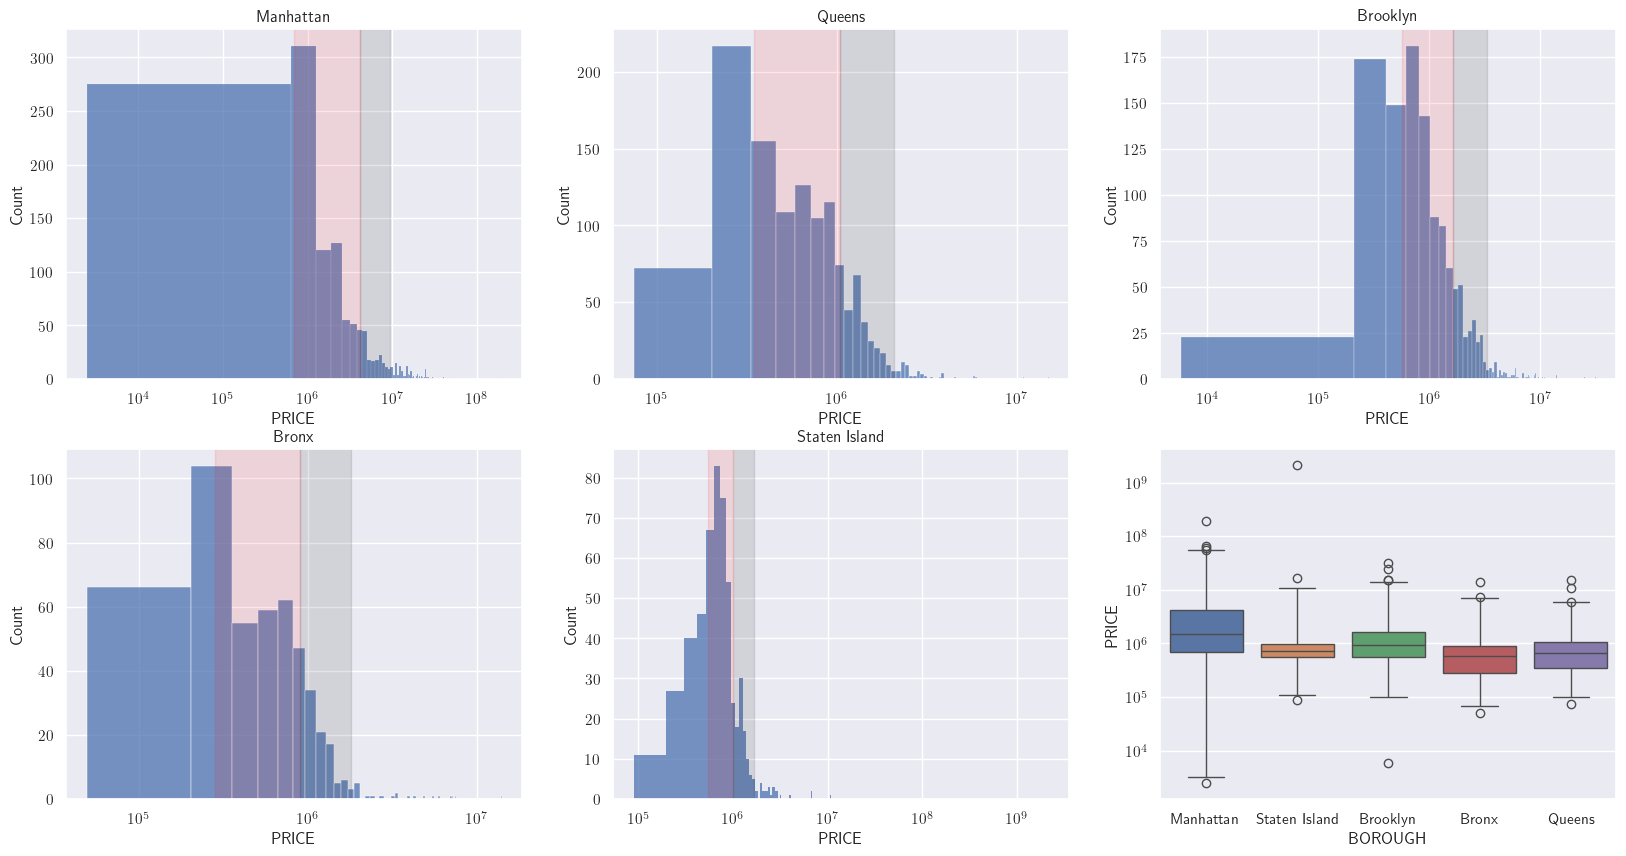

In [92]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))

price_histplot_borough(df_housing, 'Manhattan', ax=ax[0,0])
price_histplot_borough(df_housing, 'Queens', ax=ax[0,1])
price_histplot_borough(df_housing, 'Brooklyn', ax=ax[0,2])
price_histplot_borough(df_housing, 'Bronx', ax=ax[1,0])
price_histplot_borough(df_housing, 'Staten Island', ax=ax[1,1])

sns.boxplot( x=df_housing.BOROUGH, y=df_housing.PRICE, hue=df_housing.BOROUGH, whis=[0.03, 99.7], ax=ax[1,2] )
ax[1,2].set_yscale('log')

plt.show()

## Fixing outliers and other possibly misrepresented data

One way we can check the high price outlier listings is to use the stated addresses and cross-check with a real estate website like Zillow. We take a look at the ten most expensive listings in the dataframe. Now, a multi-billion dollar home should sound alarm bells from the start. Checking with Zillow, the 2.147 billion USD property in Staten Island is actually listed at 2.495 million USD with total square footage of 4,950.

In [93]:
df_housing.sort_values(by=['PRICE'], ascending=False).head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,ZIP_CODES,LOG_PRICE,PRICE_SQFT,PRICE_CAT,GEO_POINTS,BOROUGH,COMMUNITY_DISTRICT
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.0,10000.000000,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,...,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418,10309,9.331930,214748.364700,5,POINT (-74.2244185 40.5184841),Staten Island,503
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,...,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,10019,8.290035,11114.277572,5,POINT (-73.98099089999999 40.7663935),Manhattan,105
69,Brokered by Sotheby's International Realty - E...,Townhouse for sale,65000000,3,2.0,15200.000000,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,...,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317,10075,7.812913,4276.315789,5,POINT (-73.96331669999999 40.7765613),Manhattan,108
1075,Brokered by COMPASS,Co-op for sale,60000000,8,8.0,2184.207862,960 5th Ave Unit 12,"Manhattan, NY 10075","960 5th Ave Unit 12Manhattan, NY 10075",New York,...,"960 5th Ave #12, New York, NY 10075, USA",40.775642,-73.964247,10075,7.778151,27469.913026,5,POINT (-73.9642465 40.7756423),Manhattan,108
141,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,56000000,11,10.0,24000.000000,9 W 54th St,"New York, NY 10019","9 W 54th StNew York, NY 10019",United States,...,"9 W 54th St, New York, NY 10019, USA",40.761600,-73.976191,10019,7.748188,2333.333333,5,POINT (-73.9761913 40.7616),Manhattan,105
99,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,55000000,8,8.0,12000.000000,25 Riverside Dr,"New York, NY 10023","25 Riverside DrNew York, NY 10023",United States,...,"25 Riverside Dr, New York, NY 10023, USA",40.782238,-73.984632,10023,7.740363,4583.333333,5,POINT (-73.98463219999999 40.782238),Manhattan,107
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.0,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,...,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,10065,7.740363,3880.070547,5,POINT (-73.9698561 40.7672235),Manhattan,108
626,"Brokered by Nest Seekers International, Midtown",Condo for sale,50000000,6,6.0,6569.000000,100 Vandam St Apt 20A,"New York, NY 10013","100 Vandam St Apt 20ANew York, NY 10013",New York,...,"100 Vandam St #20a, New York, NY 10013, USA",40.726633,-74.008832,10013,7.698970,7611.508601,5,POINT (-74.00883210000001 40.7266327),Manhattan,102
1453,Brokered by Corcoran East Side,Co-op for sale,48000000,5,2.0,2184.207862,740 Park Ave # 4 & 5B,"New York, NY 10021","740 Park Ave # 4 & 5BNew York, NY 10021",New York,...,"740 Park Ave #5, New York, NY 10021, USA",40.770752,-73.964528,10021,7.681241,21975.930421,5,POINT (-73.9645283 40.7707516),Manhattan,108
3388,Brokered by Sotheby's International Realty - E...,Co-op for sale,45000000,5,2.0,2184.207862,4 E 66th St Fl 7,"New York, NY 10065","4 E 66th St Fl 7New York, NY 10065",New York,...,"4 E 66th St Fl 7, New York, NY 10065, USA",40.768301,-73.969734,10065,7.653213,20602.434770,5,POINT (-73.9697336 40.768301),Manhattan,108


In [94]:
# Correcting this entry

df_housing.loc[304, 'PRICE'] = 2495000
df_housing.loc[304, 'PROPERTYSQFT'] = 4950.000 

df_housing.loc[304, :]

BROKERTITLE                              Brokered by ANNE LOPA REAL ESTATE
TYPE                                                        House for sale
PRICE                                                              2495000
BEDS                                                                     7
BATH                                                                   6.0
PROPERTYSQFT                                                        4950.0
ADDRESS                                                 6659-6675 Amboy Rd
STATE                                                   New York, NY 10309
MAIN_ADDRESS                          6659-6675 Amboy RdNew York, NY 10309
ADMINISTRATIVE_AREA_LEVEL_2                                  United States
LOCALITY                                                          New York
SUBLOCALITY                                                Richmond County
STREET_NAME                                                  Staten Island
LONG_NAME                

Moreover, we should also check the three least expensive listings. The first two turns out to be apartments with monthly rent information that are similar to the price listings. However, no overall property price can be found. For the the third entry, we find that its 2023 assessed price is 179,000 USD with square footage of 4,000. With these information, the lowest two price listings will be dropped from the dataframe and the the third entry below modified.

In [95]:
df_housing.sort_values(by=['PRICE']).head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,ZIP_CODES,LOG_PRICE,PRICE_SQFT,PRICE_CAT,GEO_POINTS,BOROUGH,COMMUNITY_DISTRICT
317,Brokered by Living NY - Main Office,For sale,2494,2,1.0,2184.207862,635 W 170th St Apt 4F,"New York, NY 10032","635 W 170th St Apt 4FNew York, NY 10032",New York,...,"635 W 170th St #4f, New York, NY 10032, USA",40.843406,-73.940795,10032,3.396896,1.141833,1,POINT (-73.9407947 40.8434062),Manhattan,112
310,Brokered by Living NY - Main Office,For sale,3225,3,1.0,2184.207862,635 W 170th St Apt 2C,"New York, NY 10032","635 W 170th St Apt 2CNew York, NY 10032",New York,...,"635 W 170th St #2c, New York, NY 10032, USA",40.843406,-73.940795,10032,3.508530,1.476508,1,POINT (-73.9407947 40.8434062),Manhattan,112
360,Brokered by Century 21 Realty First,Land for sale,5800,3,2.0,2184.207862,4515 Avenue N Lot 5,"Brooklyn, NY 11234","4515 Avenue N Lot 5Brooklyn, NY 11234",New York,...,"4515 Avenue N #5, Brooklyn, NY 11234, USA",40.618915,-73.931211,11234,3.763428,2.655425,1,POINT (-73.931211 40.618915),Brooklyn,318


In [96]:
df_housing.drop( index=[310, 317], inplace=True )

df_housing.sort_values(by=['PRICE']).head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,ZIP_CODES,LOG_PRICE,PRICE_SQFT,PRICE_CAT,GEO_POINTS,BOROUGH,COMMUNITY_DISTRICT
360,Brokered by Century 21 Realty First,Land for sale,5800,3,2.0,2184.207862,4515 Avenue N Lot 5,"Brooklyn, NY 11234","4515 Avenue N Lot 5Brooklyn, NY 11234",New York,...,"4515 Avenue N #5, Brooklyn, NY 11234, USA",40.618915,-73.931211,11234,3.763428,2.655425,1,POINT (-73.931211 40.618915),Brooklyn,318
463,Brokered by Morris Park Realty Group,Co-op for sale,49500,3,2.0,800.000000,150 City Island Ave Unit E3,"Bronx, NY 10464","150 City Island Ave Unit E3Bronx, NY 10464",New York,...,"150 City Island Ave #3e, Bronx, NY 10464, USA",40.843284,-73.784603,10464,4.694605,61.875000,2,POINT (-73.7846028 40.8432844),Bronx,210
979,Brokered by COMPASS,Condo for sale,60000,3,1.0,445.000000,2 E 55th St Unit 809W35,"Manhattan, NY 10022","2 E 55th St Unit 809W35Manhattan, NY 10022",New York,...,"2 E 55th St 809 35, New York, NY 10022, USA",40.761398,-73.974613,10022,4.778151,134.831461,2,POINT (-73.9746128 40.7613979),Manhattan,105


Now, we handle those listings that have the same 2184 sqft area. Since they represent a statistically significant proportion of the data, they cannot simply be dropped. This was also the reasoning when this dataset was created in the first place. Here, we replace the sqft value of each of these by looking at properties in the same ZIP code and taking a mean. But before, let us see how these data points are representative of each borough.

In [98]:
df_same_sqft = df_housing[ df_housing.PROPERTYSQFT == area ]

df1 = df_same_sqft.groupby('BOROUGH')[['TYPE']].agg('count')
df2 = df_housing.groupby('BOROUGH')[['TYPE']].agg('count')

df_merged = df1.merge( df2, on='BOROUGH' )
df_merged.rename( columns={'TYPE_x': 'mislabeled', 'TYPE_y': 'total'}, inplace=True )

df_merged

,mislabeled,total
BOROUGH,,
Bronx,95,499
Brooklyn,297,1212
Manhattan,520,1290
Queens,680,1250
Staten Island,27,548


In [111]:
'''
Create a function that fixes the sqft values
'''
def fix_sqft(df, area):
    df1 = df[ df['PROPERTYSQFT'] != area ]
    df_sub = df[ df['PROPERTYSQFT'] == area ] # part of dataset that has the mislabeled area

    df_grouped = df.groupby(['TYPE', 'ZIP_CODES'])[['PROPERTYSQFT']].agg('mean') 

    for index, row in df_sub.iterrows():
        cd = row['ZIP_CODES']
        type = row['TYPE']

        mean_sqft = df_grouped.loc[type, cd][-1]
        df_sub.loc[index, 'PROPERTYSQFT'] = mean_sqft

    return pd.concat([df1, df_sub])

df_fixed = fix_sqft(df_housing, area)    

The function somewhat fixes the issue. Maybe there is a much better way to do this.

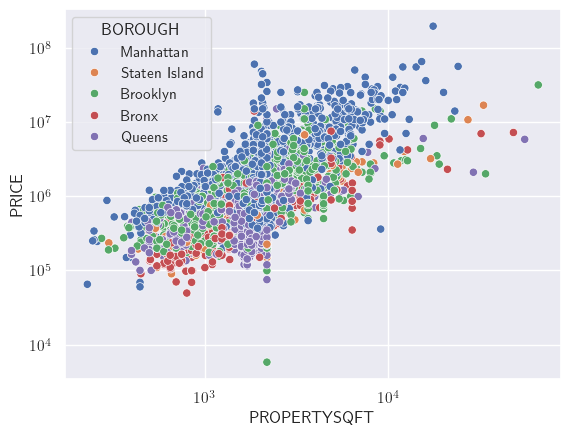

In [115]:
sns.scatterplot( x=df_fixed.PROPERTYSQFT, y=df_fixed.PRICE, hue=df_fixed.BOROUGH )
plt.xscale('log')
plt.yscale('log')
plt.show()

## Regression analysis

Here we perform a regression analysis on the cleaned dataframe. We note that the did not remove the outliers which were above the $3\sigma$ interval purely because such expensive listings were not erroneous and removing them would be unwarranted. As a result, we will use tree-based regressors - (i) Random Forest and (ii) Extreme Gradient Boosted trees to regression since these generalize well in the presence of outliers. In what follows, we will drop the 'COMMUNITY_DISTRICT' column (among others) to reduce the number of categorical features, with the expectation that the longitude and latitude data will serve as suitable replacements. Furthermore, we will also use 'LOG_PRICE' in the hopes that the smaller range of values will help with training and the predicted LOG_PRICE can always be converted back to PRICE as
$$ \rm{PRICE} = 10^{\rm{LOGPRICE}} $$

In [118]:
cols = ['TYPE', 'LOG_PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE', 'BOROUGH']

df_housing_new = df_fixed[cols]
df_housing_new.head()


,TYPE,LOG_PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,BOROUGH
0,Condo for sale,5.498311,2,2.0,1400.0,40.761255,-73.974483,Manhattan
1,Condo for sale,8.290035,7,10.0,17545.0,40.766393,-73.980991,Manhattan
2,House for sale,5.414973,4,2.0,2015.0,40.541805,-74.196109,Staten Island
3,Condo for sale,4.838849,3,1.0,445.0,40.761398,-73.974613,Manhattan
4,Townhouse for sale,7.740363,7,2.0,14175.0,40.767224,-73.969856,Manhattan


In [74]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 

X = df_housing_new.drop('LOG_PRICE', axis=1)
y = df_housing_new.LOG_PRICE

ct = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False), ['TYPE', 'BOROUGH']),
        ('standard_scaler', StandardScaler(), ['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE'])
    ]
)
ct.set_output(transform='pandas')

X_scaled = ct.fit_transform(df_housing_new)
X_scaled.head()

,ohe__TYPE_Co-op for sale,ohe__TYPE_Coming Soon,ohe__TYPE_Condo for sale,ohe__TYPE_Condop for sale,ohe__TYPE_Contingent,ohe__TYPE_For sale,ohe__TYPE_Foreclosure,ohe__TYPE_House for sale,ohe__TYPE_Land for sale,ohe__TYPE_Mobile house for sale,...,ohe__BOROUGH_Bronx,ohe__BOROUGH_Brooklyn,ohe__BOROUGH_Manhattan,ohe__BOROUGH_Queens,ohe__BOROUGH_Staten Island,standard_scaler__BEDS,standard_scaler__BATH,standard_scaler__PROPERTYSQFT,standard_scaler__LATITUDE,standard_scaler__LONGITUDE
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.521481,-0.181147,-0.314304,0.537187,-0.325263
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.399744,4.069827,6.272972,0.595815,-0.389635
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.247009,-0.181147,-0.063379,-1.966662,-2.517553
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.137236,-0.712519,-0.703951,0.538817,-0.326543
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.399744,-0.181147,4.897988,0.605285,-0.279491


We perform regression on the scaled and encoded dataset using (i) Random Forest and (ii) Extreme Gradient Boosting (XGB) regressors. First, we implement a simple version of there without performing any cross-validation and hyperparameter tuning to check performance and calculate the $R^2$ and MSE values.

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

RF_reg = RandomForestRegressor()
RF_reg.fit(X_train, y_train)
y_pred_RF = RF_reg.predict(X_test)
rmse_RF = np.sqrt(mean_squared_error(y_test, y_pred_RF))

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print( 'The R-squared score for Random Forest Regressor is ' + str(RF_reg.score(X_test, y_test)) )
print( 'The R-squared score for XGBoosted Regressor is ' + str(xgb_reg.score(X_test, y_test)) )
print( 'The RMSE for Random Forest Regressor is ' + str(rmse_RF) )
print( 'The RMSE for XGBoosted Regressor is ' + str(rmse_xgb) )

The R-squared score for Random Forest Regressor is 0.8205283986967793
The R-squared score for XGBoosted Regressor is 0.8091529195177253
The RMSE for Random Forest Regressor is 0.19069411284029397
The RMSE for XGBoosted Regressor is 0.19664466890061968


Even with the default hyperparameters, the use of LOG_PRICE gives us very good $R^2$ scores for both Random Forest and XGB. The RMSE values are also smaller than $\sigma_{\rm{LOGPRICE}}$, which is indicative of good predictive power of the model. We now perform cross-validation on these two Regressors with cv=5 before performing hyperparameter fine-tuning.

In [90]:
from sklearn.model_selection import cross_val_score

cv_score_RF = cross_val_score(RF_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
cv_score_xgb = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()

print( 'The mean RMSE for Random Forest Regression over 5-folds is ' + str( np.sqrt(-cv_score_RF) ) )
print( 'The mean RMSE for XGBoosted Regression over 5-folds is ' + str( np.sqrt(-cv_score_xgb) ) )

The mean RMSE for Random Forest Regression over 5-folds is 0.186955380071077
The mean RMSE for XGBoosted Regression over 5-folds is 0.19392952931284574


In [109]:
from sklearn.model_selection import GridSearchCV 

params_RF = [
    {
        'n_estimators' : [50, 100, 150, 200],
        'max_depth'    : [5, 10, 15]
    }
]

gs_RF = GridSearchCV(
    RandomForestRegressor(),
    param_grid = params_RF,
    scoring = ['r2', 'neg_root_mean_squared_error'], 
    refit = 'r2',
    cv=5,
    verbose=4
)

gs_RF.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=5, n_estimators=50; neg_root_mean_squared_error: (test=-0.189) r2: (test=0.799) total time=   0.1s
[CV 2/5] END max_depth=5, n_estimators=50; neg_root_mean_squared_error: (test=-0.229) r2: (test=0.737) total time=   0.1s
[CV 3/5] END max_depth=5, n_estimators=50; neg_root_mean_squared_error: (test=-0.224) r2: (test=0.755) total time=   0.1s
[CV 4/5] END max_depth=5, n_estimators=50; neg_root_mean_squared_error: (test=-0.197) r2: (test=0.786) total time=   0.1s
[CV 5/5] END max_depth=5, n_estimators=50; neg_root_mean_squared_error: (test=-0.221) r2: (test=0.773) total time=   0.1s
[CV 1/5] END max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-0.188) r2: (test=0.800) total time=   0.2s
[CV 2/5] END max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-0.229) r2: (test=0.736) total time=   0.2s
[CV 3/5] END max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-0.2

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'n_estimators': [50, 100, 150, 200]}],
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [114]:
print(gs_RF.best_params_)
print(gs_RF.best_score_)

{'max_depth': 15, 'n_estimators': 200}
0.8446693444786701


In [116]:
params_xgb = [
    {
        'n_estimators' : [50, 100, 150, 200],
        'max_depth'    : [5, 10, 15],
        'gamma'        : [0.01, 0.05, 0.1],
        'learning_rate': [0.01, 0.1, 1] 
    }
]

gs_xgb = GridSearchCV(
    XGBRegressor(),
    param_grid = params_xgb,
    scoring = ['r2', 'neg_root_mean_squared_error'], 
    refit = 'r2',
    cv=5,
    verbose=4
)

gs_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=50; neg_root_mean_squared_error: (test=-0.302) r2: (test=0.485) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=50; neg_root_mean_squared_error: (test=-0.329) r2: (test=0.456) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=50; neg_root_mean_squared_error: (test=-0.325) r2: (test=0.485) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=50; neg_root_mean_squared_error: (test=-0.307) r2: (test=0.483) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=50; neg_root_mean_squared_error: (test=-0.339) r2: (test=0.465) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=5, n_estimators=100; neg_root_mean_squared_error: (test=-0.238) r2: (test=0.680) total time=   0.1s
[CV 2/5] END

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid=[{'gamma': [0.01, 0.05, 0.1],
                          'learning_rate': [0.01, 0.1, 1],
                          'max_depth': [5, 10, 15],
                          'n_estimators': [50, 100, 150, 200]}],
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [117]:
print(gs_xgb.best_params_)
print(gs_xgb.best_score_)

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
0.8443316349972807


After performing hyperparameter fine-tuning, we see that both regressors perform similarly, yielding $R^2 \approx 0.84$.

# Conclusions

Here, we analyzed the NYC housing dataset that is available on Kaggle. After performing a thorough exploratory data analysis, where the different features where visually studied, we were able to determine the various trends and correlations present between them. For better interpretation of the latitude/longitude information in the dataset, we use, in addition to the already present dataset, geopandas to plot the listings on a geographical map of NYC with boundaries delineating the different boroughs and community districts. Using this, we performed further analysis on the dependence of the listing prices on borough and community districts in each borough.

Part of the data cleaning required identification of outliers. The listings with the lowest three prices were removed since it was reasonable to assume that the price listed were actually monthly rents and not the actual price of the properties. Furthermore, the most expensive listing turned out to be an incorrect entry as verified using Zillow information. The high price outliers were not removed since these were not incorrect prices and there would be no justification in removing them. Interestingly enough, the dataset did not have any missing values. However, we realized that they were filled in by the uploader, as a consequence of which there were numerous fractional numbers of bathrooms and over 1,600 listings with square footage of approximately 2,184. The former was further cleaned by rounding up all the bathrooms to integers. For the later problem, the community district of each of these listings was identified and instead of 2,184 sft, the average property size of the corresponding community district was used.

The community district information was mostly used for visualization and data cleaning purposes. For training a regression model, we the only attributes that were kept were 'TYPE', 'PROPERTYSQFT', 'BEDS', 'BATH', 'LONGITUDE', 'LATITUDE', and 'BOROUGH'. For better training of models, the 'LOG_PRICE' column was used as the target variable since it effectively scales the data to a smaller range and it can be easily converted to the actual price. We used 'Random Forest' and 'Extreme Gradient Boosing' regressors. Through hyperparameter fine-tuning, we found that both models perform similarly, yielding $R^2\approx 0.84$. 